<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [106]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [107]:
# Load the dataset
noise = pd.read_csv(
    'C:/Users/Ashley/Desktop/General_Assembly/unit3_project/data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

'noise'is a dataset from NASA that depicts various airfoil (cross sectional shape of wing, blade, or propellor designed to provide lift to an aircraft) aerodynamics test results. 'self_noise' is the attribute of interest for this dataset and describes the sound in decibals. The remaining variables describe the conditions that are thought to contribute to self noise and will be used as predictor variables for creating a model of self_noise. These variables include Frequency (Hertzs), the Angle of attack (degrees), Chord length (meters), and Free-stream velocity (meters per second).  

In [108]:
noise.head()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


- Find out how many rows and columns are in `noise`.

In [109]:
noise.shape

(1503, 6)

- Find out what data types are present.

In [110]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [111]:
noise.isnull().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [112]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

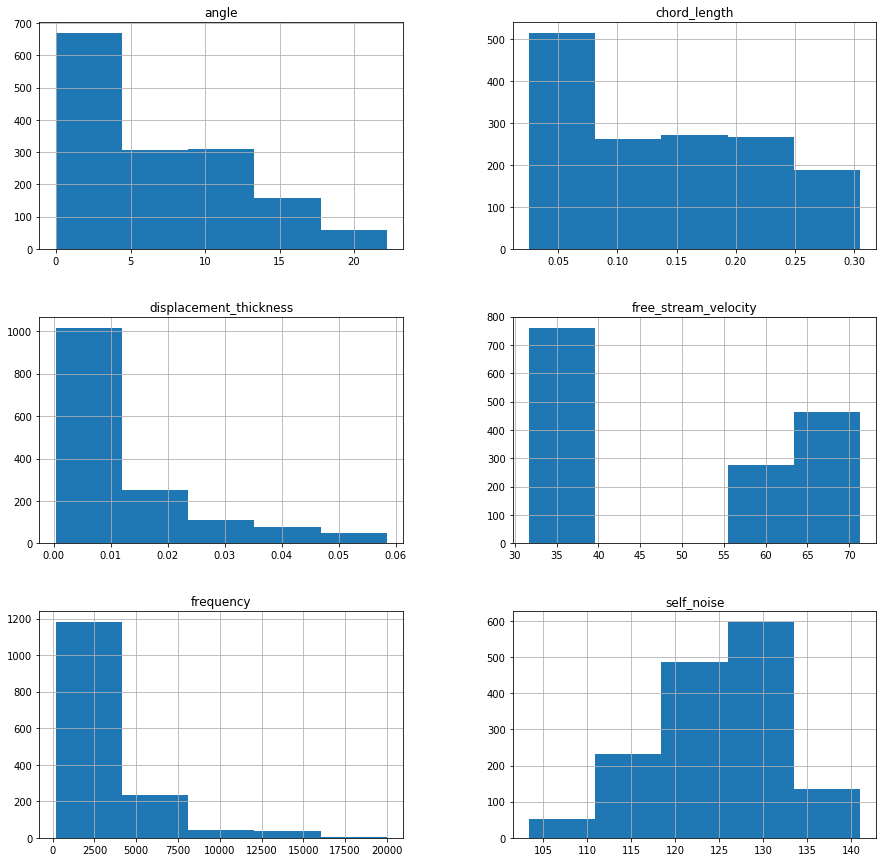

In [113]:
axes = noise.hist(figsize=(15, 15),bins=5)

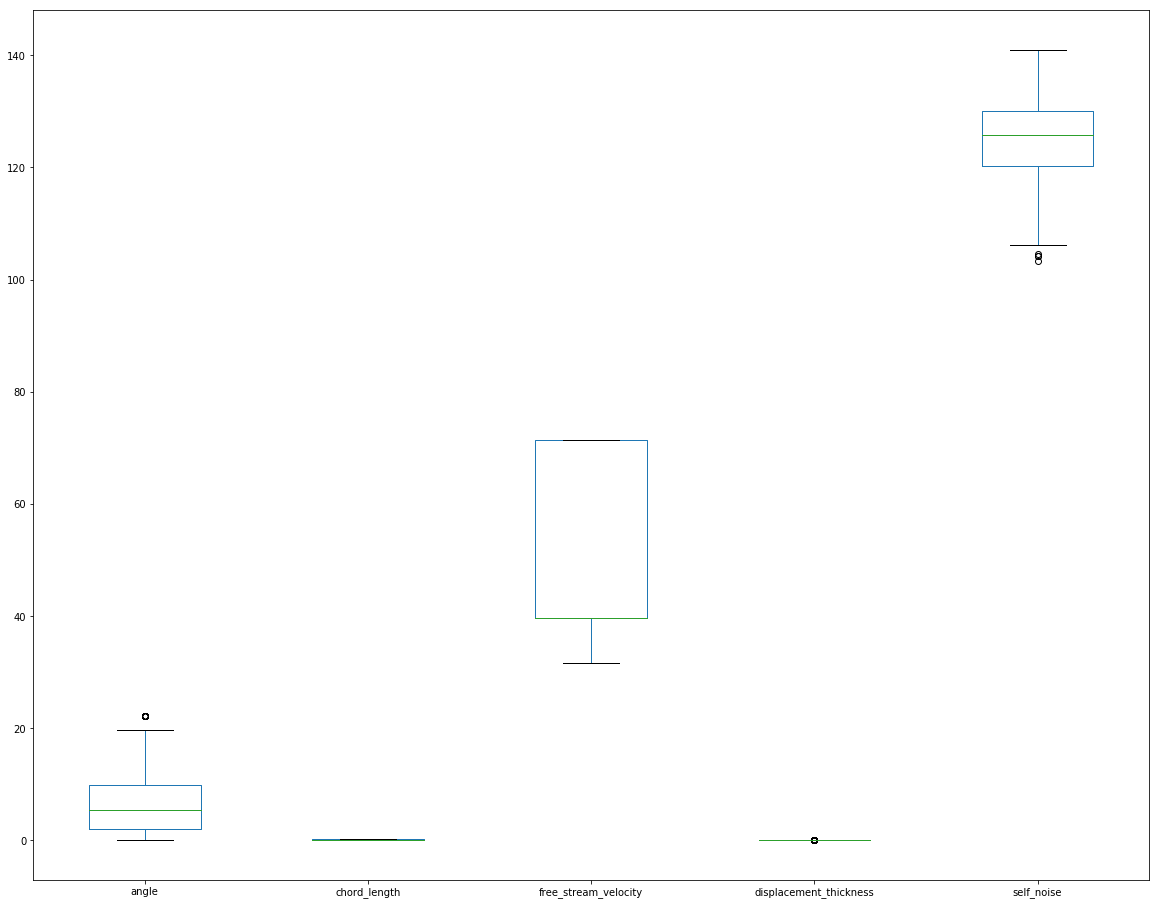

In [114]:
ax = noise.drop('frequency', axis = 1).plot(kind='box',figsize=(20, 16))

- Which variables are approximately normally distributed?

self_noise appears to be approximately normally distributed. 

- Which variables show strong skew?

frequency, angle, chord_length, free_stream_velocity, and displacement_thickness all appear to be positively skewed. 

- Make a scatterplot of each feature variable with the target variable.

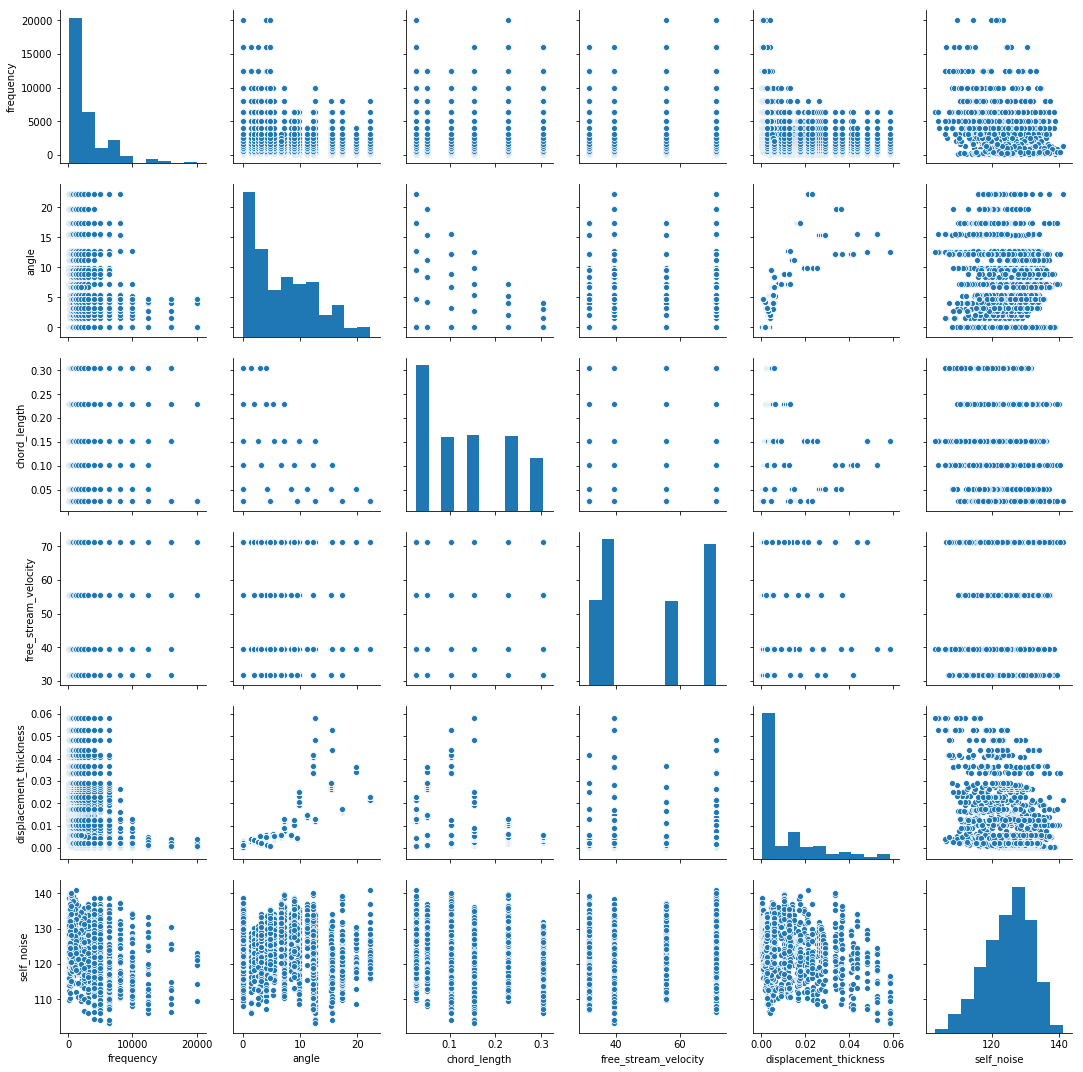

In [115]:
import seaborn as sns
axes = sns.pairplot(noise)

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

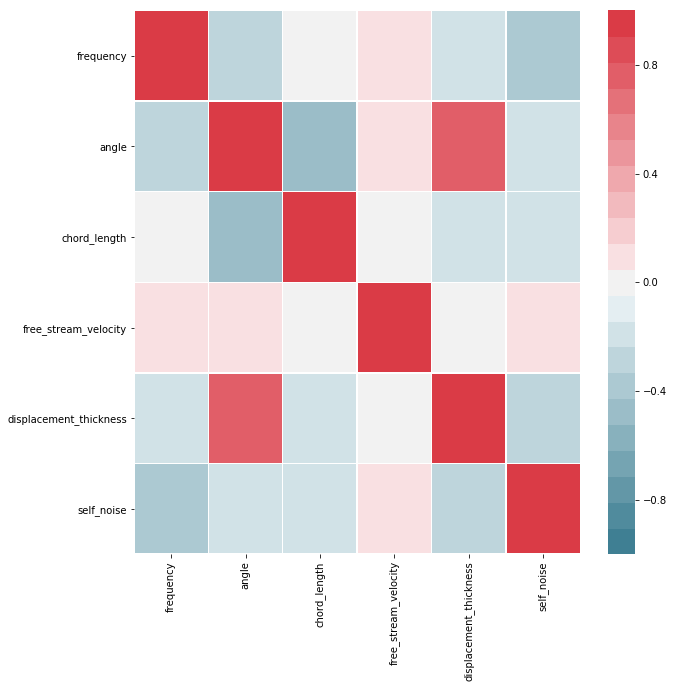

In [116]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(noise.corr(),vmin=-1, vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, ax=ax);

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

The only strong correlation appears to be between andle and displacement thickness. Self_noise has a slight correlation with free_stream_velocity and a slight negative correlation with displacement_thickness.

- Develop a linear regression model to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target_col = 'self_noise'
feature_cols = ['frequency','angle','chord_length','free_stream_velocity', 'displacement_thickness']

X=noise.drop(target_col, axis = 1)
y = noise.loc[:,target_col]
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7, train_size = .3)
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.5472703514349858
0.4991291411505108


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

There is not a large difference between the training and test dataset performance.  Because the scores are so close the model is neither overfitting or highly biased.  But, the scores are relatively low; with the model only explaining approximately half the variance of the data.  Some feature engineering will need to be performed to improve performance 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Neither, scores were relatively similar. But, if we are being nit-picky there was a slight decrease in test score indicating that there is slight bias.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [118]:
# Instantiate a DecisionTreeRegressor (with random_state=1).
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state=1)
treereg

# Use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4.17284301598577

In [119]:
treereg.fit(X_train,y_train)
print(treereg.score(X_train, y_train), treereg.score(X_test, y_test))

1.0 0.732794081701618


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

Overall performannce of the decision tree model is significantly better than the linear regression model. However, the training vs. testing scores shows that the decision tree model is overfitting; i.e. there is high bias. 

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [120]:
# The max tree depth that controls rmse will be found by looping through a range of max tree depths and visualizing the results

# List of values to try:
max_depth_range = list(range(1, 25))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

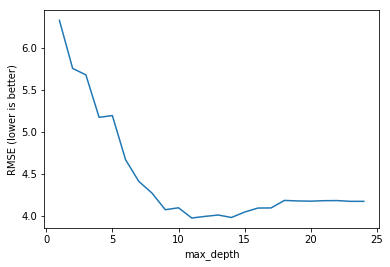

In [121]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
fig, ax = plt.subplots()
ax.plot(max_depth_range, RMSE_scores);
ax.set_xlabel('max_depth');
ax.set_ylabel('RMSE (lower is better)');

Run the Max Depth analysis on a smaller range to better visualize which depth is better between 8 and 17

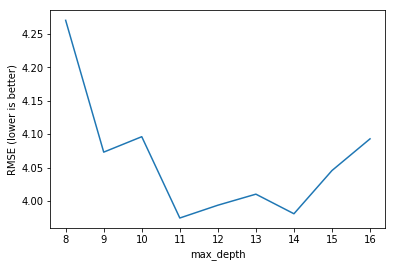

In [122]:
# Use a loop to try a range of values
# List of values to try:
max_depth_range = list(range(8, 17))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    
fig, ax = plt.subplots()
ax.plot(max_depth_range, RMSE_scores);
ax.set_xlabel('max_depth');
ax.set_ylabel('RMSE (lower is better)');

It appears that 11 is the best Max Depth

In [123]:
# max_depth=3 was best, so fit a tree using that parameter.
# /scrub/
treereg = DecisionTreeRegressor(max_depth=11, random_state=1)

treereg.fit(X_train,y_train)
print(treereg.score(X_train, y_train), treereg.score(X_test, y_test))

0.988931056052845 0.7384159093038036


The gap between training and testing scores was reduced and the testing score was slightly raised.  However, we still appear to be overfitting

- **BONUS:** Keep going! Find ways to make your model better.

In [124]:
np.random.seed(527)
samples = np.random.choice(a=1503, size=1052, replace=False)
samples
train = noise.iloc[samples,:].reset_index()
test = noise.drop(noise.index[list(samples)]).reset_index()

In [125]:
X_train = train.loc[:, feature_cols]
y_train = train.loc[:, target_col]
X_test = test.loc[:, feature_cols]
y_test = test.loc[:, target_col]

In [126]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100, bootstrap=True, oob_score=True, random_state=42)

In [127]:
from sklearn import metrics

bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.908947231535765

In [128]:
bagreg.oob_score_

0.9261207961309985

In [129]:
bagreg.fit(X_train,y_train)
print(bagreg.score(X_train, y_train), bagreg.score(X_test, y_test))

0.9896632681031461 0.9221156218448782


The gap between training and testing scores was reduced and the testing score was significantly better than both linear regression and simple decision tree models. We are still slightly overfitting.

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

In [130]:
# Load the dataset
credit = pd.read_csv(
    'C:/Users/Ashley/Desktop/General_Assembly/unit3_project/data/crx.data',
    names=range(1, 17)
)
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [131]:
credit.loc[:, 16] = credit.loc[:, 16].map({'+':1, '-':0})
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


- Find out how many rows and columns are in `credit`.

In [132]:
credit.shape

(690, 16)

- Find out what data types are present.

In [133]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16      int64
dtype: object

- Columns 2 and 3 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [134]:
# Column 3 is already float so only column tool is transformed. 
credit = credit.drop(credit.loc[credit.loc[:,2]=='?'].index)
credit.loc[:,2] = pd.to_numeric(credit.loc[:,2])

- Find out how many null values there are in each columns.

In [135]:
credit.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [136]:
credit.describe(include='all')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,678,678.000000,678.000000,678,678,678,678,678.000000,678,678,678.000000,678,678,678,678.000000,678.000000
unique,3,NaN,NaN,4,4,15,10,NaN,2,2,NaN,2,3,169,NaN,NaN
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,NaN
freq,459,NaN,NaN,511,511,136,391,NaN,355,385,NaN,369,615,129,NaN,NaN
mean,NaN,31.568171,4.777625,NaN,NaN,NaN,NaN,2.209226,NaN,NaN,2.435103,NaN,NaN,NaN,1021.240413,0.449853
std,NaN,11.957862,4.997240,NaN,NaN,NaN,NaN,3.350755,NaN,NaN,4.896966,NaN,NaN,NaN,5251.971453,0.497846
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,5.000000,0.000000
75%,NaN,38.230000,7.437500,NaN,NaN,NaN,NaN,2.573750,NaN,NaN,3.000000,NaN,NaN,NaN,395.500000,1.000000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

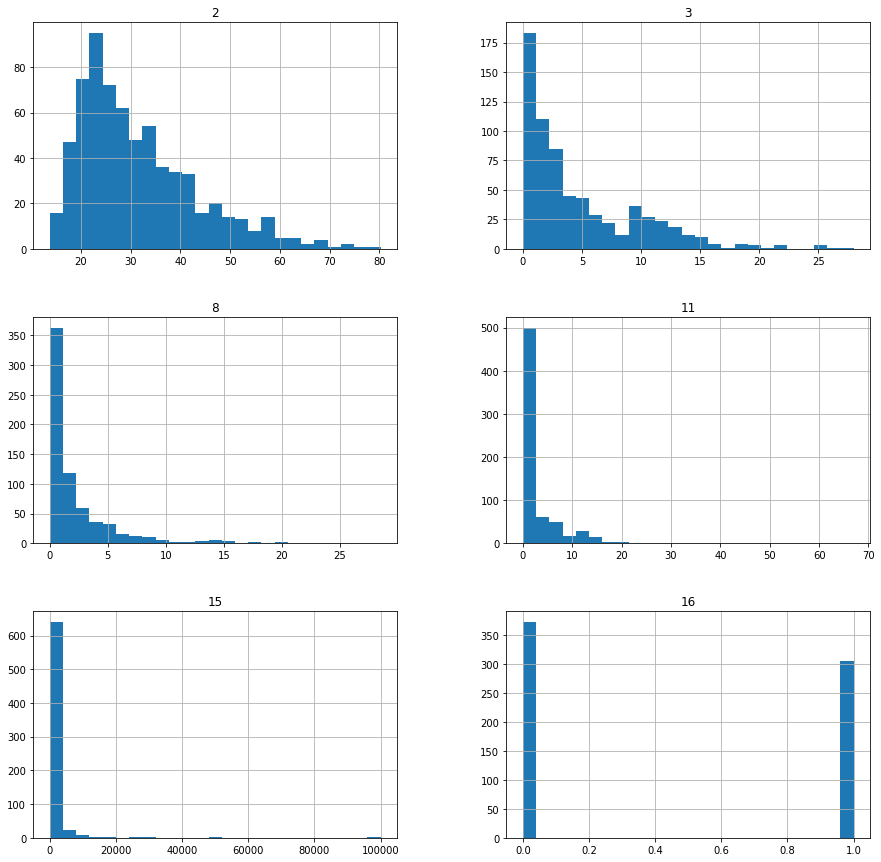

In [137]:
axes = credit.hist(figsize=(15, 15),bins=25)

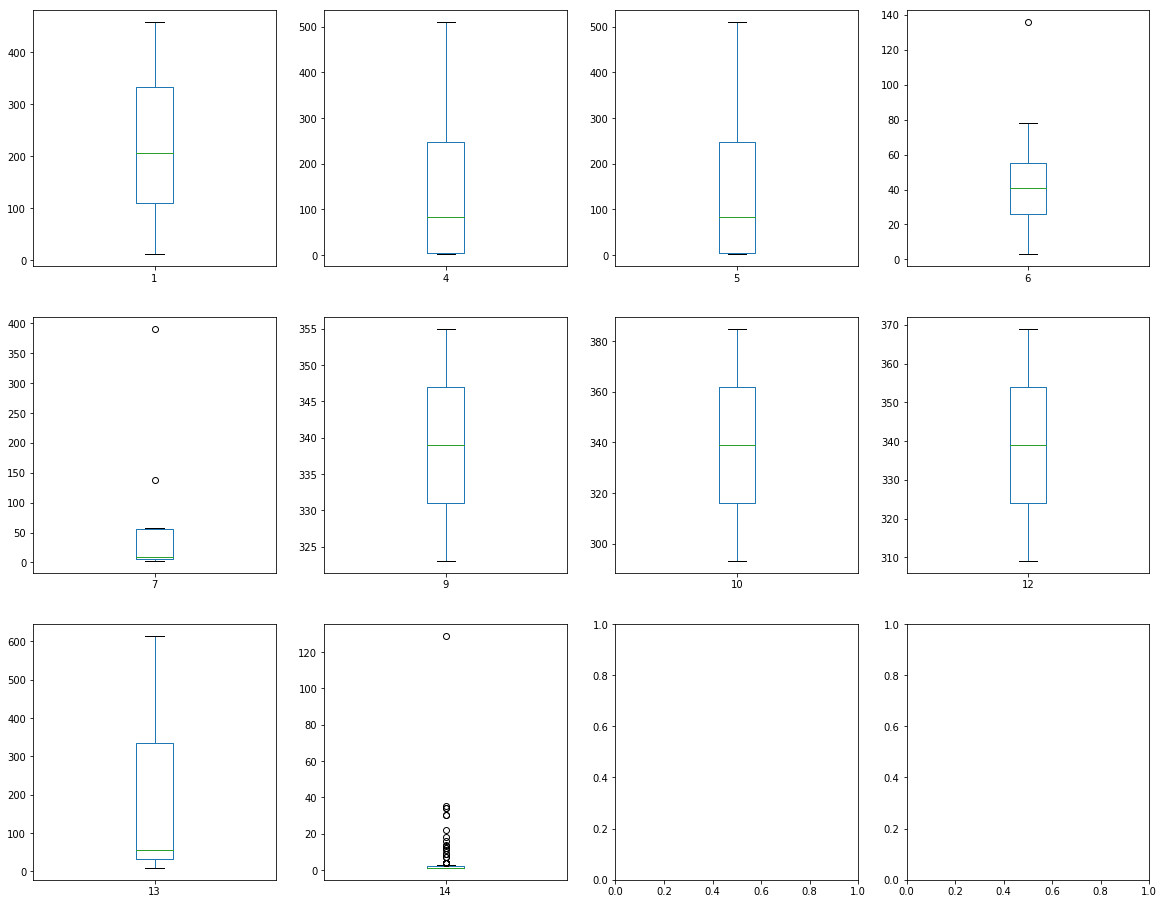

In [138]:
fig, axes = plt.subplots(3, 4, figsize=(20,16))

ax = credit.loc[:, 1].value_counts().plot(kind='box', ax=axes[0][0])
credit.loc[:, 4].value_counts().plot(kind='box', ax=axes[0][1])
credit.loc[:, 5].value_counts().plot(kind='box', ax=axes[0][2])
credit.loc[:, 6].value_counts().plot(kind='box', ax=axes[0][3])
credit.loc[:, 7].value_counts().plot(kind='box', ax=axes[1][0])
credit.loc[:, 9].value_counts().plot(kind='box', ax=axes[1][1])
credit.loc[:, 10].value_counts().plot(kind='box', ax=axes[1][2])
credit.loc[:, 12].value_counts().plot(kind='box', ax=axes[1][3])
credit.loc[:, 13].value_counts().plot(kind='box', ax=axes[2][0])
credit.loc[:, 14].value_counts().plot(kind='box', ax=axes[2][1])

- Which variables are approximately normally distributed?

Variables 9, 10 and 12 appear to be normally distributed. 

- Which variables show strong skew?

All numeric variables appear to be strongly right-skewed. 

- Make a scatterplot of each feature variable with the target variable.

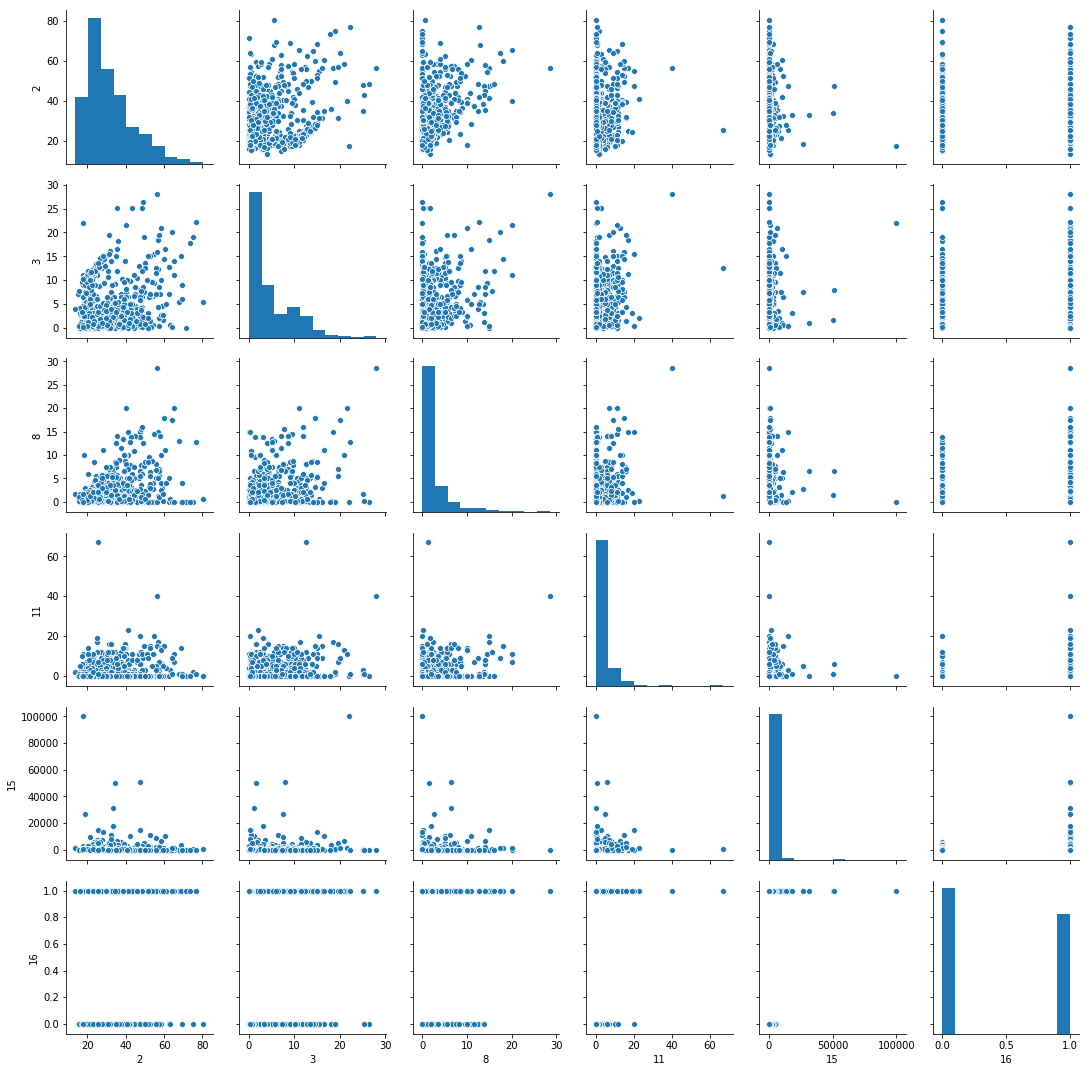

In [139]:
axes = sns.pairplot(credit)

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

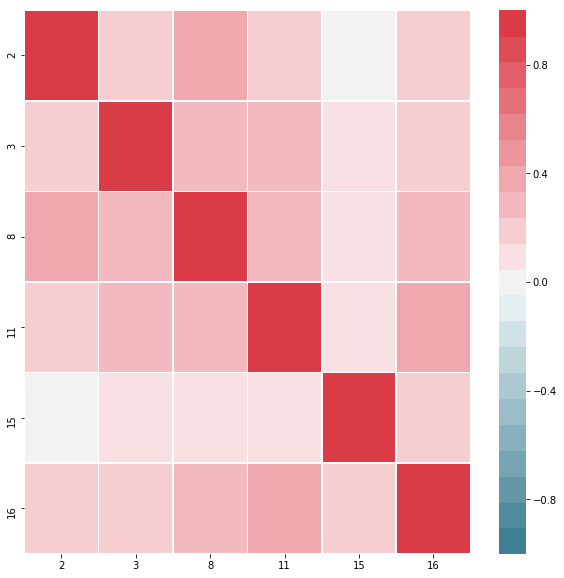

In [140]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(credit.corr(),vmin=-1, vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, ax=ax);

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

It appears that numeric variables are almost all at least moderately correlated.  However, I would be interested in finding relationships with object variables as well. 

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

- Develop a logistic regression model to predict the target variable. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [155]:
#credit.loc[credit.loc[:,2]=='?']
credit.loc[credit[14] == '?',14] = 0

In [156]:
credit.loc[:,14] = pd.to_numeric(credit.loc[:,14])
credit_dummies = pd.get_dummies(credit, columns=[1,4,5,6,7,9,10,12,13])
credit_dummies.head()

,2,3,8,11,14,15,16,1_?,1_a,1_b,...,7_z,9_f,9_t,10_f,10_t,12_f,12_t,13_g,13_p,13_s
0,30.83,0.000,1.25,1,202,0,1,0,0,1,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43,560,1,0,1,0,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0,280,824,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100,3,1,0,0,1,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120,0,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1


In [165]:
from sklearn.linear_model import LogisticRegression
target_col = 16

X=credit_dummies.drop(target_col, axis = 1)
y = credit_dummies.loc[:,target_col]
lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8818897637795275
0.8823529411764706


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Because the r^2 for test and training are so close we can say that this model is well balanced and does not have a bias or  variance problem.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

Because the r^2 for test and training are so close we can say that this model is neither overfitting or underfitting.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

See answer above.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

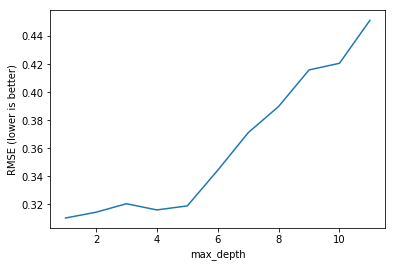

In [168]:
# Use a loop to try a range of values
# List of values to try:
max_depth_range = list(range(1, 12))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    
fig, ax = plt.subplots()
ax.plot(max_depth_range, RMSE_scores);
ax.set_xlabel('max_depth');
ax.set_ylabel('RMSE (lower is better)');

It appears that 4 is the best Max Depth

In [169]:
# max_depth=3 was best, so fit a tree using that parameter.
# /scrub/
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)

treereg.fit(X_train,y_train)
print(treereg.score(X_train, y_train), treereg.score(X_test, y_test))

0.6910151734408718 0.4854437097212843


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

The overall predictive performance decreased.  The model is overfit due to the difference in train and test scores. However, the overall predictive accuracy is only moderate.  

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

Because the target feature is binary it makes more sense to use a RandomForestClassifier rather than a regressor. 

In [204]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.8705882352941177


The RandomForestClassifier is overfit and does not have improved performance over simple logistic regression.

In [186]:
# identify the 10 most importance of predictor variables. 
pd.DataFrame(list(zip(credit_dummies.columns,
    rfc.feature_importances_)
)).sort_values(by=1, ascending=False).head(10)

,0,1
42,7_z,0.196815
43,9_f,0.147730
2,8,0.073164
5,15,0.067345
4,14,0.062439
3,11,0.060867
1,3,0.060352
0,2,0.059425
44,9_t,0.036662
45,10_f,0.036137


In [205]:
# Rerun the random forest classifier with only the most important predictor variables. 
feature_cols = ['7_z','9_f', 8, 15, 14, 11, 3, 2, '9_t', '10_f']
X=credit_dummies.drop(target_col, axis = 1)
y = credit_dummies.loc[:,target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y)

rfc = RandomForestClassifier(n_estimators=200, oob_score=False)
rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.8823529411764706


Reducing predictor variables did not solve overfitting and reducted the predictive accuracy of the model. I will remove the features associated with column 6 becuse they have very little correlation with the target variable and control the max depth of the trees to reduce overfitting. 

In [207]:
credit_dummies_drop = credit_dummies.drop(['6_c', '6_d', '6_cc', '6_i', '6_j', '6_k', '6_m', '6_r', '6_q', '6_w', '6_x', '6_e', '6_aa', '6_ff'], axis=1)

In [209]:
X=credit_dummies.drop(target_col, axis = 1)
y = credit_dummies.loc[:,target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y)

rfc = RandomForestClassifier(max_depth = 4, n_estimators=200, oob_score=True)
rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9015748031496063
0.8529411764705882


- **BONUS:** Keep going! Find ways to make your model better.

In [194]:
np.random.seed(527)
samples = np.random.choice(a=678, size=475, replace=False)
samples
train = credit_dummies.iloc[samples,:].reset_index()
test = credit_dummies.drop(credit_dummies.index[list(samples)]).reset_index()

In [195]:
X_train = train.loc[:, feature_cols]
y_train = train.loc[:, target_col]
X_test = test.loc[:, feature_cols]
y_test = test.loc[:, target_col]

In [217]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(RandomForestClassifier(n_estimators = 100), n_estimators=100, bootstrap=True, oob_score=True, random_state=42)

In [218]:
from sklearn import metrics

bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.349855432328

In [219]:
bagreg.oob_score_

0.5784111214029309

In [220]:
bagreg.fit(X_train,y_train)
print(bagreg.score(X_train, y_train), bagreg.score(X_test, y_test))

0.9433099597585513 0.5093180746289361


This bagging regression model is does not have the variance provlem (i.e. overfitting) of the previous model but the accuracy has decreased. 